In [ ]:
import pandas as pd
import glob
import regex as re
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/Shareddrives/Microcredential data team 1"

/content/drive/Shareddrives/Microcredential data team 1


# get all perkiraan cuaca

In [ ]:
PerkiraanCuaca2017=pd.DataFrame()
for p in  glob.glob('./Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2017/*'):
    PerkiraanCuaca2017=PerkiraanCuaca2017.append(pd.read_csv(p,encoding='cp1252', usecols=['tanggal', 'wilayah',
                                                                         'waktu', 'cuaca', 
                                                                         'kelembaban_persen','suhu_derajat_celcius']),ignore_index=True)


PerkiraanCuaca2017.tanggal=PerkiraanCuaca2017.tanggal.apply(pd.to_datetime)
PerkiraanCuaca2017=PerkiraanCuaca2017.sort_values('tanggal', ignore_index=True)

PerkiraanCuaca2017.cuaca=PerkiraanCuaca2017.cuaca.apply(lambda x:x.strip())
PerkiraanCuaca2017.kelembaban_persen=PerkiraanCuaca2017.kelembaban_persen.apply(lambda x:x.strip())
PerkiraanCuaca2017.suhu_derajat_celcius=PerkiraanCuaca2017.suhu_derajat_celcius.apply(lambda x:x.strip())

PerkiraanCuaca2017=PerkiraanCuaca2017.dropna(how='any',axis=0)
PerkiraanCuaca2017

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2017-01-03,Jakarta Pusat,Pagi,Hujan Ringan,65 - 95,22 - 31
1,2017-01-03,Kepulauan Seribu,Malam,Hujan Ringan,65 - 95,22 - 31
2,2017-01-03,Jakarta Timur,Malam,Hujan Ringan,65 - 95,22 - 31
3,2017-01-03,Jakarta Barat,Malam,Hujan Ringan,65 - 95,22 - 31
4,2017-01-03,Jakarta Selatan,Malam,Hujan Ringan,65 - 95,22 - 31
...,...,...,...,...,...,...
6271,2017-10-31,Jakarta Barat,Pagi,Hujan Lokal,75 - 90,24 - 32
6272,2017-10-31,Jakarta Timur,Pagi,Hujan Lokal,75 - 90,24 - 32
6273,2017-10-31,Jakarta Pusat,Dini Hari,Berawan,75 - 90,24 - 32
6274,2017-10-31,Jakarta Pusat,Siang,Berawan Tebal,75 - 90,24 - 32


In [ ]:
PerkiraanCuaca2017.tanggal[1]

Timestamp('2017-01-03 00:00:00')

In [ ]:
PerkiraanCuaca2018=pd.DataFrame()
for p in  glob.glob('./Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2018/*'):
    PerkiraanCuaca2018=PerkiraanCuaca2018.append(pd.read_csv(p,encoding='cp1252', usecols=['tanggal', 'wilayah',
                                                                         'waktu', 'cuaca', 
                                                                         'kelembaban_persen','suhu_derajat_celcius']),ignore_index=True)



PerkiraanCuaca2018.tanggal=PerkiraanCuaca2018.tanggal.apply(lambda x:pd.to_datetime(x,errors='coerce'))
PerkiraanCuaca2018=PerkiraanCuaca2018.sort_values('tanggal', ignore_index=True)

PerkiraanCuaca2018.cuaca=PerkiraanCuaca2018.cuaca.apply(lambda x:x.strip())
PerkiraanCuaca2018.kelembaban_persen=PerkiraanCuaca2018.kelembaban_persen.apply(lambda x:x.strip())
PerkiraanCuaca2018.suhu_derajat_celcius=PerkiraanCuaca2018.suhu_derajat_celcius.apply(lambda x:x.strip())

PerkiraanCuaca2018.dropna(how='any',axis=0,inplace=True)
PerkiraanCuaca2018

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-01-02,Jakarta Utara,Dini Hari,Berawan,70 – 95,24 – 33
1,2018-01-02,Kepulauan Seribu,Pagi,Cerah,65 – 95,23 – 32
2,2018-01-02,Jakarta Pusat,Pagi,Cerah,65 – 95,23 – 32
3,2018-01-02,Jakarta Utara,Pagi,Cerah,65 – 95,23 – 32
4,2018-01-02,Jakarta Timur,Siang,Hujan Ringan,65 – 95,23 – 32
...,...,...,...,...,...,...
8371,2018-12-31,Jakarta Selatan,Pagi,Berawan,70 – 90,24 – 32
8372,2018-12-31,Jakarta Barat,Pagi,Berawan,70 – 90,24 – 32
8373,2018-12-31,Jakarta Timur,Pagi,Berawan,70 – 90,24 – 32
8374,2018-12-31,Jakarta Barat,Malam,Berawan,70 – 90,24 – 32


In [ ]:
PerkiraanCuacaAll=PerkiraanCuaca2017.append(PerkiraanCuaca2018,ignore_index=True)
del PerkiraanCuaca2017
del PerkiraanCuaca2018

In [ ]:
PerkiraanCuacaAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               14652 non-null  datetime64[ns]
 1   wilayah               14652 non-null  object        
 2   waktu                 14652 non-null  object        
 3   cuaca                 14652 non-null  object        
 4   kelembaban_persen     14652 non-null  object        
 5   suhu_derajat_celcius  14652 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 686.9+ KB


Data keseluruhan tersimpan di dalam variable PerkiraanCuacaAll

# tambahin jumlah kota rawan 

In [ ]:
kotaRawan= pd.read_csv('./Daerah Rawan Banjir Provinsi DKI Jakarta/daerah-rawan-banjir-provinsi-dki-jakarta (1).csv')
kotaRawan=kotaRawan.groupby("kota").count()['kecamatan']
kotaRawan

kota
JAKARTA BARAT      17
JAKARTA PUSAT       2
JAKARTA SELATAN    25
JAKARTA TIMUR      23
JAKARTA UTARA      15
Name: kecamatan, dtype: int64

In [ ]:
def inputKotaRawan(inp):
    try:
        inp['BanyakKotaRawan']=kotaRawan[inp.wilayah.upper()]
    except:
        pass
    return inp
    

In [ ]:
PerkiraanCuacaAll['BanyakKotaRawan']=0
PerkiraanCuacaAll=PerkiraanCuacaAll.apply(inputKotaRawan,axis=1)
del kotaRawan
PerkiraanCuacaAll

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,BanyakKotaRawan
0,2017-01-03,Jakarta Pusat,Pagi,Hujan Ringan,65 - 95,22 - 31,2
1,2017-01-03,Kepulauan Seribu,Malam,Hujan Ringan,65 - 95,22 - 31,0
2,2017-01-03,Jakarta Timur,Malam,Hujan Ringan,65 - 95,22 - 31,23
3,2017-01-03,Jakarta Barat,Malam,Hujan Ringan,65 - 95,22 - 31,17
4,2017-01-03,Jakarta Selatan,Malam,Hujan Ringan,65 - 95,22 - 31,25
...,...,...,...,...,...,...,...
14647,2018-12-31,Jakarta Selatan,Pagi,Berawan,70 – 90,24 – 32,25
14648,2018-12-31,Jakarta Barat,Pagi,Berawan,70 – 90,24 – 32,17
14649,2018-12-31,Jakarta Timur,Pagi,Berawan,70 – 90,24 – 32,23
14650,2018-12-31,Jakarta Barat,Malam,Berawan,70 – 90,24 – 32,17


Simpan hasil excel

In [ ]:
PerkiraanCuacaAll.to_excel('cuaca2017-2018.xlsx')

# Tambahin data banjir


In [ ]:
kejadianBanjir2017=pd.DataFrame()
for p in  glob.glob('./Data Kejadian Bencana Banjir Tahun 2017 di DKI Jakarta/*'):
    temp=pd.read_csv(p,usecols=range(18))
    bulan= re.findall('[a-zA-Z]+\.',p)[0][:-1]
    tahun= re.findall('\d{4}',p)[0]       

    temp['bulan']=bulan
    temp['tahun']=tahun
    kejadianBanjir2017 = kejadianBanjir2017.append(temp,ignore_index=True)
    

kejadianBanjir2017.dropna(how='any',axis=0,inplace=True)
kejadianBanjir2017.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,bulan,tahun
0,Jakarta Barat,KALIDERES,KAMAL,"01, 04",2.0,6.0,0.0,0.0,20 s/d 30 cm,"tgl. 03, 04, 06, 20",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,desember,2017
1,Jakarta Barat,GROGOL PETAMBURAN,JELAMBAR BARU,"01,06, 07",3.0,2.0,0.0,0.0,10 s/d 20 cm,"tgl. 05, 06, 07, 09",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,desember,2017
2,Jakarta Selatan,PASAR MINGGU,JATI PADANG,6,1.0,1.0,8.0,35.0,5 - 50 cm,"tgl. 01, 11, 16, 20",0.0,0.0,0.0,0.0,35.0,1.0,0.0,0.0,desember,2017
3,Jakarta Selatan,PANCORAN,KALIBATA,"05, 09, 10",3.0,3.0,0.0,0.0,20 s/d 30 cm,tgl. 12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,desember,2017
4,Jakarta Selatan,SETIABUDI,KUNINGAN TIMUR,5,1.0,1.0,0.0,0.0,20 s/d 25 cm,tgl. 12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,desember,2017


In [ ]:
kejadianBanjir2018=pd.DataFrame()
for p in  glob.glob('./Data Kejadian Bencana Banjir Tahun 2018 di DKI Jakarta/*'):
    temp=pd.read_csv(p,usecols=range(18))
    bulan= re.findall('[a-zA-Z]+\.',p)[0][:-1] 
    tahun= re.findall('\d{4}',p)[0]      
    temp['bulan']=bulan
    temp['tahun']=tahun
    kejadianBanjir2018 = kejadianBanjir2018.append(temp,ignore_index=True)
    
del p
del bulan
del temp
kejadianBanjir2018.dropna(how='any',axis=0,inplace=True)
kejadianBanjir2018.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,bulan,tahun
0,Jakarta Barat,PENJARINGAN,KAMAL MUARA,"01, 04",2,12,0,0,20 s/d 30 cm,tgl. 02,0,0,0,0,0,0,0,0,januari,2018
1,Jakarta Utara,KALIDERES,KAMAL,"1, 4",2,3,0,0,10 s/d 25 cm,"tgl. 03, 04, 05, 18, 31",0,0,0,0,0,0,0,0,januari,2018
2,Jakarta Utara,GROGOL PETAMBURAN,JELAMBAR BARU,1,1,2,0,0,15 cm,tgl. 03,0,0,0,0,0,0,0,0,januari,2018
3,Jakarta Utara,GROGOL PETAMBURAN,JELAMBAR,7,1,1,0,0,20 cm,tgl. 03,0,0,0,0,0,0,0,0,januari,2018
4,Jakarta Utara,KEMBANGAN,KEMBANGAN UTARA,"3, 4, 5, 6",4,2,0,0,5 s/d 20 cm,tgl. 18,0,0,0,0,0,0,0,0,januari,2018


In [ ]:
kejadianBanjirGabung=kejadianBanjir2017.append(kejadianBanjir2018,ignore_index=True)
del kejadianBanjir2017
del kejadianBanjir2018

# reform PerkiraanCuacaAll

In [ ]:
PerkiraanCuacaAll.waktu=PerkiraanCuacaAll.apply(lambda x: x.waktu.lower(),axis=1)



In [ ]:
PerkiraanCuacaAll.waktu.unique()

array(['pagi', 'malam', 'siang', 'dini hari'], dtype=object)

In [ ]:
result=PerkiraanCuacaAll.drop(columns=['waktu','cuaca','kelembaban_persen','suhu_derajat_celcius'])
result=result.drop_duplicates()
result

,tanggal,wilayah,BanyakKotaRawan
0,2017-01-03,Jakarta Pusat,2
1,2017-01-03,Kepulauan Seribu,0
2,2017-01-03,Jakarta Timur,23
3,2017-01-03,Jakarta Barat,17
4,2017-01-03,Jakarta Selatan,25
...,...,...,...
14629,2018-12-31,Jakarta Pusat,2
14630,2018-12-31,Kepulauan Seribu,0
14631,2018-12-31,Jakarta Selatan,25
14632,2018-12-31,Jakarta Barat,17


In [ ]:
columnTambahan=['cuaca_dini','cuaca_pagi','cuaca_siang','cuaca_malam','kelembaban_pagi','kelembaban_siang','kelembaban_malam','kelembaban_dini','suhu_pagi','suhu_siang','suhu_malam','suhu_dini']
for i in columnTambahan:
    result[i]=np.nan


In [ ]:
for i,data in PerkiraanCuacaAll.iterrows():
    tanggal=data.tanggal
    wilayah=data.wilayah
    waktu=data.waktu

    if waktu=='pagi':
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'cuaca_pagi']=data.cuaca
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'kelembaban_pagi']=data.kelembaban_persen
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'suhu_pagi']=data.suhu_derajat_celcius
        
    elif waktu=='siang':
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'cuaca_siang']=data.cuaca
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'kelembaban_siang']=data.kelembaban_persen
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'suhu_siang']=data.suhu_derajat_celcius
       
    elif waktu=='malam':
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'cuaca_malam']=data.cuaca
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'kelembaban_malam']=data.kelembaban_persen
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'suhu_malam']=data.suhu_derajat_celcius
       
    elif waktu=='dini hari':
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'cuaca_dini']=data.cuaca
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'kelembaban_dini']=data.kelembaban_persen
        result.loc[(result.tanggal==tanggal)&(result.wilayah==wilayah),'suhu_dini']=data.suhu_derajat_celcius

result.reset_index()
del PerkiraanCuacaAll
del columnTambahan
       

# combine dengan Kejadian Banjir

In [ ]:
columnTambahan=["min_air","max_air","jumlah_terdampak_rw",
"jumlah_terdampak_rt","jumlah_terdampak_kk","jumlah_terdampak_jiwa",
"jumlah_luka_ringan","jumlah_pengungsi","banjir?"]

for i in columnTambahan:
    result[i]=0


del i
del columnTambahan

In [ ]:
def getTanggal(inp):
    tanggal=inp.tanggal_kejadian                              
    tanggal=re.sub("\(.*\)","",tanggal) # buang yang dalam kurung
    tanggal=re.sub("\\n","",tanggal) # buang \n
    tanggal=re.sub("\d{3,}","",tanggal) # buang 3 digit atau lebih
    tanggal=re.sub("tgl.|[a-zA-z]+","",tanggal) # buang depannya tgl dan semua huruf
    
    tanggal= tanggal.replace(" ", "").split(',')
    
    convert={'januari':1,'februari':2,'maret':3,'april':4,'mei':5,'juni':6,'juli':7,'agustus':8,'september':9,'oktober':10,'november':11,'desember':12}
    bulan=convert[inp.bulan]
    tahun=inp.tahun
    
    listTanggal=[]
    for tgl in tanggal:
        if tgl.find('-') != -1:
            min=int(tgl[:tgl.find('-')])
            max=int(tgl[tgl.find('-')+1:])
            listTanggal+=list(range(min,max+1))
        else:
            listTanggal+=[int(tgl)]

    listTanggal=[listTanggal]
    resTanggal=[]
    for tgl in listTanggal:
        resTanggal+=[str(tahun)+'-'+str(bulan)+'-'+str(i) for i in tgl]
     
        

    return resTanggal


In [ ]:
result[result.tanggal==getTanggal(kejadianBanjirGabung.iloc[12,:])[0]]

,tanggal,wilayah,BanyakKotaRawan,cuaca_dini,cuaca_pagi,cuaca_siang,cuaca_malam,kelembaban_pagi,kelembaban_siang,kelembaban_malam,kelembaban_dini,suhu_pagi,suhu_siang,suhu_malam,suhu_dini,min_air,max_air,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,jumlah_luka_ringan,jumlah_pengungsi,banjir?


In [ ]:
result[result.tanggal==getTanggal(kejadianBanjirGabung.iloc[75,:])[0]]

,tanggal,wilayah,BanyakKotaRawan,cuaca_dini,cuaca_pagi,cuaca_siang,cuaca_malam,kelembaban_pagi,kelembaban_siang,kelembaban_malam,kelembaban_dini,suhu_pagi,suhu_siang,suhu_malam,suhu_dini,min_air,max_air,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,jumlah_luka_ringan,jumlah_pengungsi,banjir?
4332,2017-08-10,Jakarta Selatan,25,Berawan Tebal,Hujan Lokal,Hujan Lokal,Berawan,65 - 90,65 - 90,65 - 90,65 - 90,25 - 33,25 - 33,25 - 33,25 - 33,0,0,0,0,0,0,0,0,0
4333,2017-08-10,Kepulauan Seribu,0,Hujan Lokal,Berawan Tebal,Berawan Tebal,Hujan Ringan,65 - 90,65 - 90,65 - 90,65 - 90,25 - 33,25 - 33,25 - 33,25 - 33,0,0,0,0,0,0,0,0,0
4334,2017-08-10,Jakarta Pusat,2,Berawan Tebal,Berawan Tebal,Hujan Lokal,Berawan,65 - 90,65 - 90,65 - 90,65 - 90,25 - 33,25 - 33,25 - 33,25 - 33,0,0,0,0,0,0,0,0,0
4335,2017-08-10,Jakarta Utara,15,Berawan Tebal,Berawan Tebal,Berawan Tebal,Berawan,65 - 90,65 - 90,65 - 90,65 - 90,25 - 33,25 - 33,25 - 33,25 - 33,0,0,0,0,0,0,0,0,0
4336,2017-08-10,Jakarta Timur,23,Berawan Tebal,Hujan Lokal,Hujan Lokal,Berawan,65 - 90,65 - 90,65 - 90,65 - 90,25 - 33,25 - 33,25 - 33,25 - 33,0,0,0,0,0,0,0,0,0
4341,2017-08-10,Jakarta Barat,17,Berawan Tebal,Berawan Tebal,Hujan Lokal,Berawan,65 - 90,65 - 90,65 - 90,65 - 90,25 - 33,25 - 33,25 - 33,25 - 33,0,0,0,0,0,0,0,0,0


In [ ]:
kejadianBanjirGabung.columns

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw',
       'jumlah_terdampak_rw', 'jumlah_terdampak_rt', 'jumlah_terdampak_kk',
       'jumlah_terdampak_jiwa', 'ketinggian_air', 'tanggal_kejadian',
       'lama_genangan', 'jumlah_meninggal', 'jumlah_hilang',
       'jumlah_luka_berat', 'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi',
       'jumlah_tempat_pengungsian', 'nilai_kerugian', 'bulan', 'tahun'],
      dtype='object')

In [ ]:
# skip ketinggian_air lama_genangan jumlah_pengungsi_tertinggi


#columnTambahan=["min_air","max_air","jumlah_terdampak_rw",
#"jumlah_terdampak_rt","jumlah_terdampak_kk","jumlah_terdampak_jiwa",
#"jumlah_luka_ringan","jumlah_pengungsi","banjir?"]


In [ ]:
result.min_air=999
for i,data in kejadianBanjirGabung.iterrows():
    tanggal=getTanggal(data)
    wilayah=data.kota_administrasi
    
    for tgl in tanggal:    
        resultIndexing=(result.tanggal==tgl)&(result.wilayah==wilayah)
        result.loc[resultIndexing,'jumlah_terdampak_rw']+=data.jumlah_terdampak_rw
        result.loc[resultIndexing,'jumlah_terdampak_rt']+=data.jumlah_terdampak_rt
        result.loc[resultIndexing,'jumlah_terdampak_kk']+=data.jumlah_terdampak_kk
        result.loc[resultIndexing,'jumlah_luka_ringan']+=data.jumlah_luka_ringan
        result.loc[resultIndexing,'jumlah_terdampak_jiwa']+=data.jumlah_terdampak_jiwa
        result.loc[resultIndexing,'jumlah_pengungsi']+=data.jumlah_pengungsi_tertinggi
        result.loc[resultIndexing,'banjir?']=1

        tinggiAir=re.findall('\d+',data.ketinggian_air)
        for t in tinggiAir:
            t=int(t)
            if t<result.loc[resultIndexing,'min_air'].values:
                result.loc[resultIndexing,'min_air']=t
            if t>result.loc[resultIndexing,'max_air'].values:
                result.loc[resultIndexing,'max_air']=t

for c in ['min_air','max_air']:
    result[c]=result[c].replace(999,np.nan)
    result[c]=result[c].replace(0,np.nan)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [ ]:
result.to_excel('combine2017-2018.xlsx')

In [ ]:
df =pd.read_excel('combine2017-2018.xlsx')
df.head(5)

,Unnamed: 0,tanggal,wilayah,BanyakKotaRawan,cuaca_dini,cuaca_pagi,cuaca_siang,cuaca_malam,kelembaban_pagi,kelembaban_siang,kelembaban_malam,kelembaban_dini,suhu_pagi,suhu_siang,suhu_malam,suhu_dini,min_air,max_air,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,jumlah_luka_ringan,jumlah_pengungsi,banjir?
0,0,2017-01-03,Jakarta Pusat,2,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
1,1,2017-01-03,Kepulauan Seribu,0,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
2,2,2017-01-03,Jakarta Timur,23,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
3,3,2017-01-03,Jakarta Barat,17,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
4,4,2017-01-03,Jakarta Selatan,25,NaN,Berawan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
df = df.iloc[:,1:]
df.head(5)

,tanggal,wilayah,BanyakKotaRawan,cuaca_dini,cuaca_pagi,cuaca_siang,cuaca_malam,kelembaban_pagi,kelembaban_siang,kelembaban_malam,kelembaban_dini,suhu_pagi,suhu_siang,suhu_malam,suhu_dini,min_air,max_air,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,jumlah_luka_ringan,jumlah_pengungsi,banjir?
0,2017-01-03,Jakarta Pusat,2,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2017-01-03,Kepulauan Seribu,0,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
2,2017-01-03,Jakarta Timur,23,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
3,2017-01-03,Jakarta Barat,17,NaN,Hujan Ringan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0
4,2017-01-03,Jakarta Selatan,25,NaN,Berawan,Hujan Petir,Hujan Ringan,65 - 95,65 - 95,65 - 95,NaN,22 - 31,22 - 31,22 - 31,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

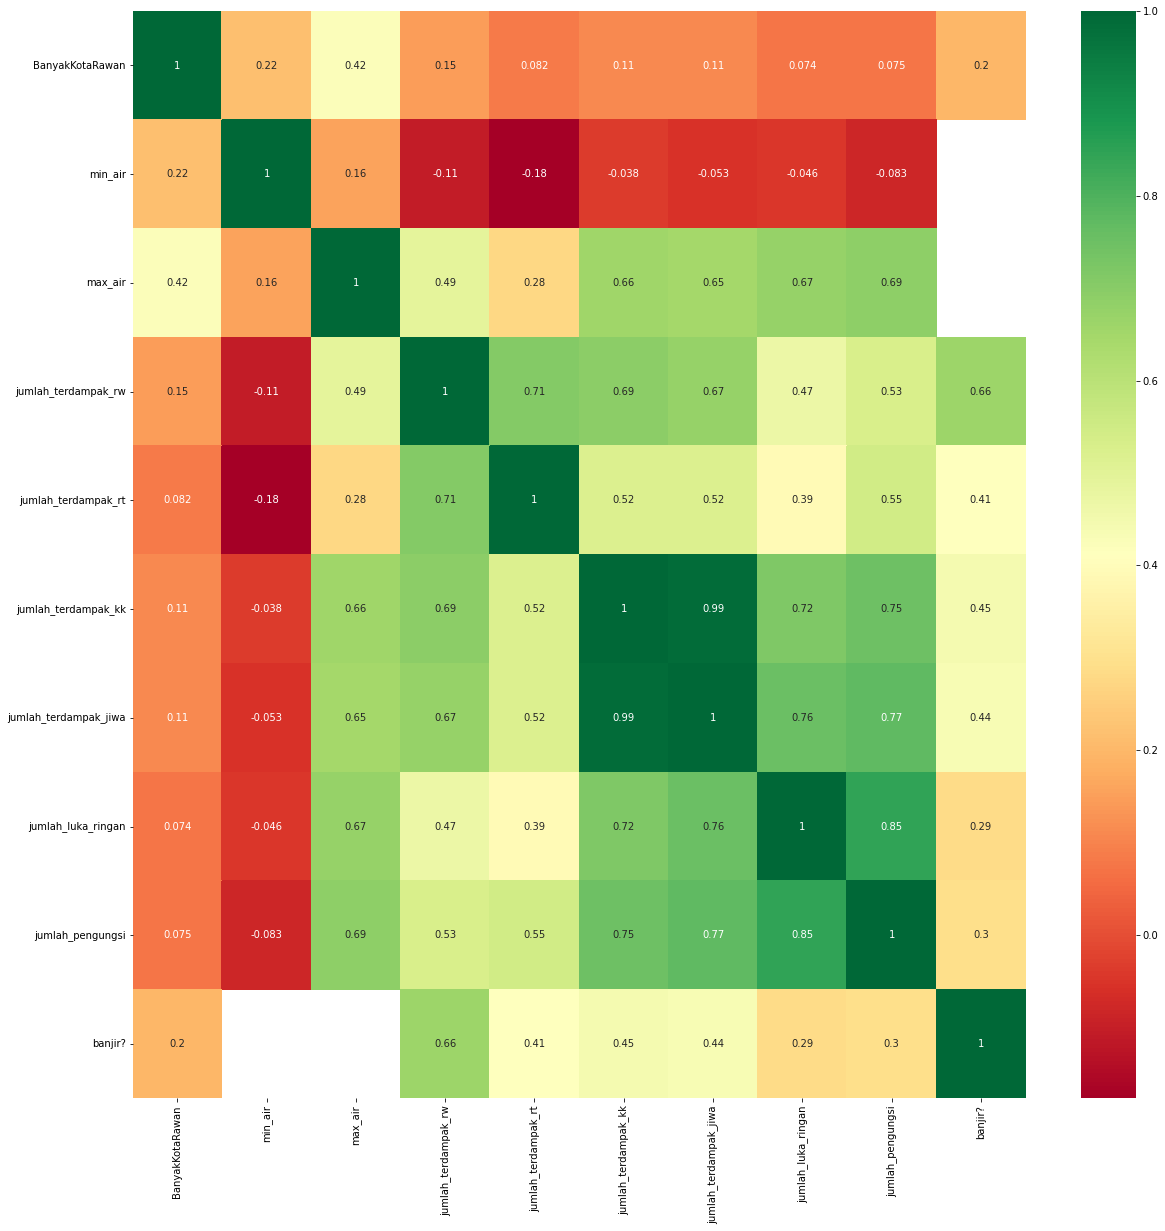

In [ ]:

# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heatmap
h = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")